Configurações iniciais (herdadas da APS3):

In [132]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy.stats as stat

In [133]:
# Inicialização e preparação dos dados para manipulação
pd.set_option('display.max_columns', None)
df = pd.read_csv('GfSD\SDGData.csv', sep=',',decimal='.', skiprows=0)
df = df.set_index('Indicator Name')

# Indicador escolhido nas entregas anteriores
df = df.loc['Share of youth not in education, employment or training, total (% of youth population)']

# Preparação dos anos, e países por bloco
years = [str(i) for i in range(2000,2021)]
country_names = {
    'MERCOSUL' : ['Brazil','Argentina','Paraguay','Uruguay','Venezuela, RB','Chile','Peru','Colombia','Ecuador','Guyana','Suriname'] ,
    'UE' : ['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden'],
}

In [134]:
# Tratando e dividindo o dataset

df = df.set_index('Country Name')

df_mercosul = df.loc[country_names['MERCOSUL']]
df_eu = df.loc[country_names['UE']]

In [135]:
# Determinando um critério por meio do cálculo de uma distribuição normal para cada país

# Escolhemos o ano de 2020 por ser o mais próximo do ano atual (2022)
mean = df['2020'].mean()
std = df['2020'].std()

z = (df['2020'] - mean)/std
w = 2
filtro = (z < w) * (z > -w)
x = df['2020'][filtro]

In [136]:
# Definindo o critério por código
criterio_avancado_mundial = z < z.mean()
criterio_atrasado_mundial = z >= z.mean()

# Probabilidades de cada bloco ser avançado ou atrasado de acordo com o critério mundial
P_avancado_mundial = criterio_avancado_mundial.value_counts()[True]/criterio_avancado_mundial.value_counts().sum()
P_atrasado_mundial = criterio_avancado_mundial.value_counts()[True]/criterio_avancado_mundial.value_counts().sum()


In [137]:
# Além de calcular esse critério para o mundo, vamos calcular para cada bloco. Isso será usado nas questões posteriores


# MERCOSUL
mean = df_mercosul['2020'].mean()
std = df_mercosul['2020'].std()

z = (df_mercosul['2020'] - mean)/std
w = 2
filtro = z < w
x = df_mercosul['2020'][filtro]
filtro = z > -w
x = x[filtro]

criterio_avancado_mercosul = z < z.mean()
criterio_atrasado_mercosul = z >= z.mean()


# UE
mean = df_eu['2020'].mean()
std = df_eu['2020'].std()

z = (df_eu['2020'] - mean)/std
w = 2
filtro = z < w
x = df_eu['2020'][filtro]
filtro = z > -w
x = x[filtro]

criterio_avancado_eu = z < z.mean()
criterio_atrasado_eu = z >= z.mean()

In [138]:
data = pd.DataFrame(criterio_avancado_mercosul.value_counts())
data1 = pd.DataFrame(criterio_avancado_eu.value_counts())
data['bloco'] = ['MERCOSUL atrasado','MERCOSUL avançado']
data1['bloco'] = ['UE atrasado','UE avançado']

# merge data1 and data
data = data.append(data1)
data = data.set_index('bloco')

C:\Users\pache\AppData\Local\Temp\ipykernel_10944\2106342372.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data1)


# Questão 1

In [139]:
P_avancado_eu = criterio_avancado_eu.value_counts()[True]/criterio_avancado_eu.value_counts().sum()
P_avancado_mercosul = criterio_avancado_mercosul.value_counts()[True]/criterio_avancado_mercosul.value_counts().sum()

print('A probabilidade de um país do MERCOSUL ser avançado é de {:.2f}%.'.format(P_avancado_mercosul*100))
print('A probabilidade de um país da UE ser avançado é de {:.2f}%.'.format(P_avancado_eu*100))

A probabilidade de um país do MERCOSUL ser avançado é de 18.18%.
A probabilidade de um país da UE ser avançado é de 57.69%.


# Questão 2

In [140]:
data_mercosul = [criterio_avancado_mercosul]
data_eu = [criterio_avancado_eu]

data_mercosul = np.array(data_mercosul)
data_eu = np.array(data_eu)

data_mercosul = (data_mercosul,)
data_eu = (data_eu,)

# fazer o próprio bootstrapping em vez de usar a função pronta

def reamostrar_varias_vezes(amostras, n, m):
    # Coloque sua função aqui
    mean = []
    p_avançado = []
    for i in range(n):
        favoravel = 0
        amostras_ = np.random.choice(amostras, size=m, replace=True)

        for n in amostras_:
            if n <= amostras.mean():
                favoravel += 1
        p_avançado.append(favoravel/m)

    return np.mean(p_avançado), np.percentile(p_avançado, 5) , np.percentile(p_avançado, 95)

#reamostrar_varias_vezes(df_mercosul['2020'],100,100),reamostrar_varias_vezes(df_eu['2020'],100,100)

print(f'O intervalo de confiança para a probabilidade de um país do MERCOSUL ser avançado é de aproximadamente {reamostrar_varias_vezes(df_mercosul["2020"],100,100)[1]*100:.2f}% a {reamostrar_varias_vezes(df_mercosul["2020"],100,100)[2]*100:.2f}%.')
print(f'O intervalo de confiança para a probabilidade de um país da UE ser avançado é de aproximadamente {reamostrar_varias_vezes(df_eu["2020"],100,100)[1]*100:.2f}% a {reamostrar_varias_vezes(df_eu["2020"],100,100)[2]*100:.2f}%.')

O intervalo de confiança para a probabilidade de um país do MERCOSUL ser avançado é de aproximadamente 11.95% a 24.05%.
O intervalo de confiança para a probabilidade de um país da UE ser avançado é de aproximadamente 50.00% a 67.05%.


# Questão 3

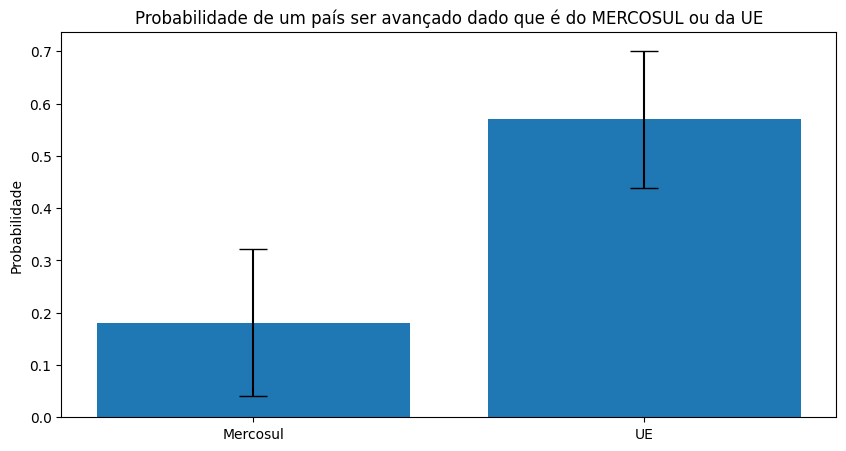

In [141]:
plt.figure(figsize=(10,5))

mercosul_dados = reamostrar_varias_vezes(df_mercosul['2020'],100,100)
mercosul_p = mercosul_dados[0]
mercosul_low = mercosul_dados[1]
mercosul_high = mercosul_dados[2]

eu_dados = reamostrar_varias_vezes(df_eu['2020'],100,100)
eu_p = eu_dados[0]
eu_low = eu_dados[1]
eu_high = eu_dados[2]

plt.bar(['Mercosul', 'UE'], [mercosul_p, eu_p], yerr=[mercosul_high-mercosul_low, eu_high-eu_low], capsize=10)
plt.title('Probabilidade de um país ser avançado dado que é do MERCOSUL ou da UE')
plt.ylabel('Probabilidade')
plt.show()

Observando a figura, não há sobreposição do intervalo de confiança de nenhum dos blocos.

# Questão 4